# Reinforcement Learning (RL)


<img src="images/mr-anderson.png" alt="Mr. Anderson" width="200"/>
<img src="images/matrix-environment.png" alt="Matrix" width="460"/>

Reinforcement Learning (RL) is a type of machine learning where an agent learns to make decisions by interacting with an $environment$. The $agent$ receives $rewards$ or penalties based on its $actions$ and aims to maximize the cumulative reward over time. It’s trial-and-error learning, guided by a reward signal, without being explicitly told what to do.

Where:
- **Agent**: The decision-maker (e.g., a robot, game player).  It is the entire decision-making entity or system (think about Mr. Anderson in the movie Matrix).  It encapsulates the strategic policy, the learning algorithm, and the model.  The model can be thought of as the brain of the agent.
- **Environment**: The world the agent interacts with (e.g., a maze, a game). The real `Matrix`.
- **State (s)**: The current situation of the agent in the environment.
- **Action (a)**: A decision or choice the agent makes in the environment.  E.g., move left, jump.
- **Reward (r)**: Feedback from the environment (positive for good actions, negative for bad).  In a maze-solving game, the reward might be +10 points for reaching the goal; the punishment might be -5 points for hitting a wall, etc.
- **Policy (π)**: The strategy the agent uses to choose actions based on states.
- **Value Function**: Estimates the expected long-term reward for a state or action.

The agent explores the environment, updates its policy based on rewards, and balances **exploration** (trying new actions) and **exploitation** (using known good actions). A common algorithm is **Q-learning**, where the agent maintains a Q-table (state-action value pairs) and updates it using the formula:


$$Q(s, a) ← Q(s, a) + α [r + γ * max(Q(s', a')) - Q(s, a)]$$

Where:
- $\alpha$: Learning rate.  It controls how quickly the agent learns from the new experience.  It has a range from 0 to 1.  A low learn rate can be more stable but slower to _converge_.  A high learn rate can be faster but more unstable. 0 means it never learns and will keep the initial values. 1 means it completely overwrites old knowledge.  E.g. `new_val = old_val + 0.1 * (target - old_val)` means only 0.1 or 10% of the new information is incorporated into the new knowledge.  Commonly set to 0.1 to 0.3, meaning we must balance between stable v.s. fast learning.  A note on _converge_: in the context of learning rate in reinformcement learning, _convergence_ means reaching a stable and (near) optimal solution.
- $\gamma$: Discount factor (future reward importance).  It determins how much future rewards matter compared to immediate rewards.  It has a range from 0 to 1.  Low gamma means agent preferes immediate rewards.  High gamma means agent values future rewards almost as much as immediate rewards.  0 means agent cares only about immediate rewards.  1 means agent cares about future rewards as much as immediate rewards.  E.g. `future_val = immediate_reward + 0.9 * next_state_value` means future rewards are worth 90% of immediate rewards.  Commonly set to 0.9 to 0.99.  Meaning we must balance between short-term v.s. long-term rewards.
- $s^\prime$: Next state
- $max(Q(s', a'))$: Best future reward estimate

### Q-Learning Example
In a 1D grid, an agent moves left or right to reach a goal.  Plot the learning progress.  The code use a dumb random strategy to decide whether to move to left or right.  A small penalty is given for each move unless the goal is hit.  This is obviously not fair as a step towards the goal should be rewarded in reality.


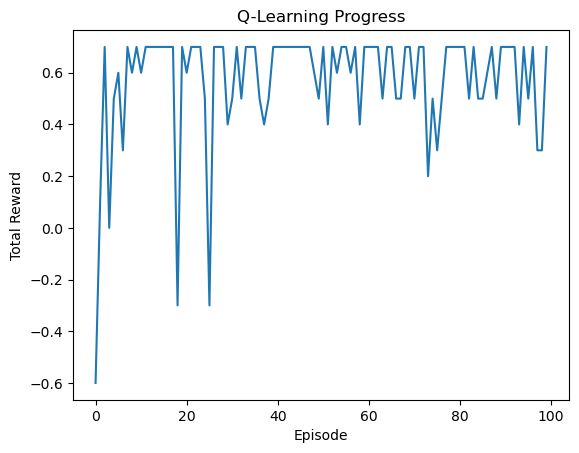

Final Q-table:
 [[0.13935996 0.45528585]
 [0.14190863 0.6190828 ]
 [0.15651482 0.79985701]
 [0.44047584 0.99997344]
 [0.         0.        ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Environment: 1D grid [0, 1, 2, 3, 4], goal at 4
states = 5
actions = 2  # 0: left, 1: right
Q = np.zeros((states, actions))  # Q-table
goal = 4

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
episodes = 100
rewards = []

# Q-learning
for episode in range(episodes):
    state = 0  # Start at 0
    total_reward = 0
    while state != goal:
        # Choose action (epsilon-greedy simplified to random for demo)
        action = np.random.choice([0, 1]) if np.random.random() < 0.2 else np.argmax(Q[state])
        
        # Next state and reward
        # Determine next state based on action
        if action == 0:  # Move left
            next_state = state - 1 if state > 0 else state  # Move left if possible, else stay
        else:  # action == 1, Move right
            next_state = state + 1 if state < 4 else state  # Move right if possible, else stay
        reward = 1 if next_state == goal else -0.1  # Small penalty for non-goal steps
        total_reward += reward
        
        # Update Q-table
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        state = next_state
    
    rewards.append(total_reward)

# Plot learning progress
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning Progress')
plt.show()

print("Final Q-table:\n", Q)

### Same Q-Learning Example with animation
Now plot the agent movements and the learning progress on the side.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib
matplotlib.use('TkAgg')  # Force TkAgg backend for interactive animation

# Environment: 1D grid [0, 1, 2, 3, 4], goal at 4
states = 5
actions = 2  # 0: left, 1: right
Q = np.zeros((states, actions))  # Q-table
goal = 4

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
episodes = 5  # Reduced for faster animation
epsilon = 0.2  # Exploration rate

# Data for animation
all_states = []
all_rewards = []

# Q-learning with step tracking
for episode in range(episodes):
    state = 0  # Start at 0
    total_reward = 0
    episode_states = [state]
    
    while state != goal:
        action = np.random.choice([0, 1]) if np.random.random() < epsilon else np.argmax(Q[state])
        # Determine next state based on action
        if action == 0:  # Move left
            next_state = state - 1 if state > 0 else state  # Move left if possible, else stay
        else:  # action == 1, Move right
            next_state = state + 1 if state < 4 else state  # Move right if possible, else stay
        reward = 1 if next_state == goal else -0.1
        total_reward += reward
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        state = next_state
        episode_states.append(state)
    
    all_states.append(episode_states)
    all_rewards.append(total_reward)

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 2]})

# Grid plot (left)
ax1.set_title("Agent on Grid")
ax1.set_xlim(-0.5, states - 0.5)
ax1.set_ylim(-0.5, 0.5)
ax1.set_xticks(range(states))
ax1.set_yticks([])
ax1.grid(True)
agent_dot, = ax1.plot([0], [0], 'ro', markersize=15, label='Agent')  # Initialize with starting position
ax1.plot(goal, 0, 'g*', markersize=20, label='Goal')
ax1.legend()

# Reward plot (right)
ax2.set_title("Total Reward Over Episodes")
ax2.set_xlabel("Episode")
ax2.set_ylabel("Total Reward")
ax2.set_xlim(0, episodes - 1)
ax2.set_ylim(min(all_rewards) - 0.5, max(all_rewards) + 0.5)
reward_line, = ax2.plot([], [], 'b-', label='Reward')
ax2.legend()

# Animation initialization function
def init():
    agent_dot.set_data([0], [0])  # Initial agent position
    reward_line.set_data([], [])  # Initial empty reward plot
    return agent_dot, reward_line

# Animation function
def animate(frame):
    max_steps = max([len(steps) for steps in all_states])
    episode = frame // max_steps
    step = frame % max_steps
    
    episode = min(episode, len(all_states) - 1)
    step = min(step, len(all_states[episode]) - 1)
    
    # Update agent position
    agent_dot.set_data([all_states[episode][step]], [0])
    
    # Update reward plot
    completed_episodes = min(episode + 1, len(all_rewards))
    reward_line.set_data(list(range(completed_episodes)), all_rewards[:completed_episodes])
    
    return agent_dot, reward_line

# Total frames
total_frames = episodes * max([len(steps) for steps in all_states])
ani = FuncAnimation(fig, animate, frames=total_frames, init_func=init, interval=100, blit=True)

# Ensure the animation displays
plt.tight_layout()
plt.show(block=True)  # Block to keep window open

print("Final Q-table:\n", Q)

Final Q-table:
 [[-0.0937791  -0.0955488 ]
 [-0.07810164 -0.0555737 ]
 [-0.0217468   0.0264581 ]
 [-0.0109      0.40951   ]
 [ 0.          0.        ]]



### Explanation
- **Setup**: A 5-state grid (0 to 4), goal at 4. Actions are left (0) or right (1).
- **Q-table**: Stores expected rewards for each state-action pair.
- **Learning**: The agent randomly explores 20% of the time (ε=0.2) or exploits the best action. The Q-table updates after each step.
- **Plot**: Shows total reward per episode, trending upward as the agent learns to reach the goal efficiently.

The plot shows the agent’s reward improving over time, and the Q-table will reflect higher values for actions leading to the goal (e.g., moving right from state 3). This is RL in action—learning through feedback!

## Reinforcement Learning with Human Feedback



## Libraries
- baseline3
```python
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env

# Create your environment (must follow gym interface)
env = YourEnvironment()

# Initialize the agent
model = DQN('MlpPolicy', env, verbose=1)

# Train the agent
model.learn(total_timesteps=10000)

# Save the model
model.save("dqn_model")

# Load the model
model = DQN.load("dqn_model")
```
- Tensorflow Agents (TF-Agents)
- RLib (part of Ray) - Good for distributed training